In [ ]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### IMPORTAR DATOS DEL JSON

In [ ]:
# Leer los datos del archivo JSON
data_raw = pd.read_json('./Ventas_registro.json')

In [ ]:
# Desanidamos los productos para usar los valores anidados (nombre - cantidad - total)
data_flat = pd.json_normalize(data_raw.to_dict(orient='records'), record_path='productos', meta=['tipo_venta', 'fecha_venta', 'pago_total', 'cliente'])

#### ANALIZAR INFORMACIÓN BÁSICA

In [ ]:
# Primeras 10 filas
print(data_flat.head(10))

In [ ]:
# Dimensión del dataset
data_flat.shape

In [ ]:
# Nombre de las columnas
data_flat.columns.values

In [ ]:
# Tipo de datos
data_flat.dtypes

In [ ]:
# Información de los datos
data_flat.info()

------

In [ ]:
# Resumen de datos numéricos
data_flat.describe()

In [ ]:
# Resumen de datos categóricos
data_flat.describe(include=['object'])

#### ANALIZAR VALORES AUSENTES (MISSING)

In [ ]:
pd.isnull(data_flat["nombre"])

In [ ]:
pd.isnull(data_flat["cantidad"])

In [ ]:
pd.isnull(data_flat["total"])

-------

In [ ]:
pd.isnull(data_flat["nombre"]).values.ravel().sum()

In [ ]:
pd.isnull(data_flat["cantidad"]).values.ravel().sum()

In [ ]:
pd.isnull(data_flat["total"]).values.ravel().sum()

#### ANALIZAR GRÁFICOS

In [ ]:
# Para nombre de producto no se puede realizar gráfica por tener valores muy largos

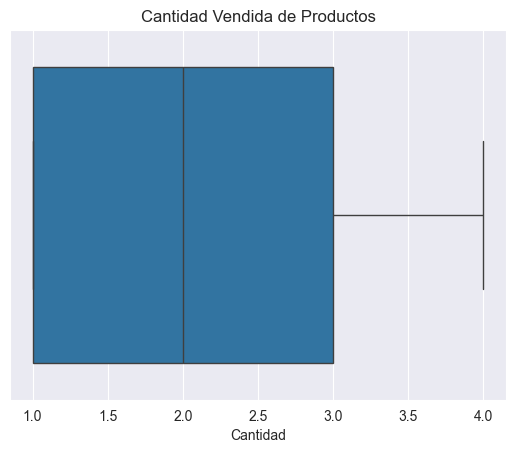

In [45]:
sns.boxplot(x=data_flat['cantidad'])
plt.title('Cantidad Vendida de Productos')
plt.xlabel('Cantidad')
plt.show()

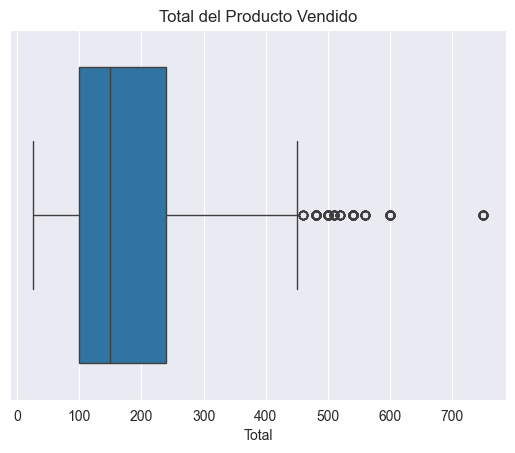

In [46]:
sns.boxplot(x=data_flat['total'])
plt.title('Total del Producto Vendido')
plt.xlabel('Total')
plt.show()

In [ ]:
sns.displot(data_flat["cantidad"], bins=10)
plt.title('Cantidad Vendida de Productos')
plt.xlabel('Cantidad')
plt.show()

------

In [ ]:
# Gráfico con todas las variables (cantidad - total)
plt.figure(figsize=(20,8))
sns.boxplot(data=data_flat)
plt.show()

#### ANALIZAR VALORES AUSENTES (GENERAL)

In [ ]:
#Análisis de los valores ausentes
data_flat.isnull().sum()

In [ ]:
#Porcentaje de los valores ausentes
data_raw.isnull().sum()/data_raw.shape[0]*100

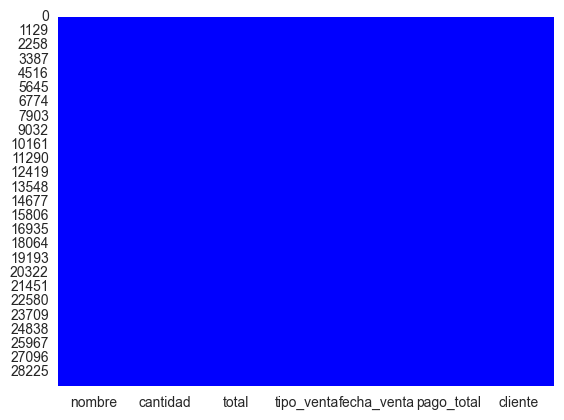

In [44]:
#Mapa de calor de missing
sns.heatmap(data_flat.isnull(), cbar=False, cmap="bwr")
plt.show()